### Read in data

In [1]:
%matplotlib inline
import pandas as pd

In [2]:
#custom style HTML output

from IPython.core.display import HTML

csspath1 = r'C:\COURSERA\PYCON2015_TUTORIALS\Brandon Rhodes - Pandas From The Ground Up - PyCon 2015\style-table.css'
csspath2 = r'C:\COURSERA\PYCON2015_TUTORIALS\Brandon Rhodes - Pandas From The Ground Up - PyCon 2015\style-notebook.css'

css = open(csspath1).read() + open(csspath2).read()
HTML('<style>{}</style>'.format(css))

In [3]:
path1 = r'C:\COURSERA\PYCON2015_TUTORIALS\Brandon Rhodes - Pandas From The Ground Up - PyCon 2015\data\titles.csv'
path2 = r'C:\COURSERA\PYCON2015_TUTORIALS\Brandon Rhodes - Pandas From The Ground Up - PyCon 2015\data\cast.csv'

titles = pd.DataFrame.from_csv(path1 , index_col=None)
cast = pd.DataFrame.from_csv(path2, index_col=None)

In [5]:
titles.head(3)

,title,year
0,Insane,2010
1,Dreamer,2011
2,Down in San Diego,1941


### Stacking and unstacking

In [6]:
c1 = cast
c1 = c1[(c1.character == 'Kermit the Frog') | (c1.character == 'Oscar the Grouch')]

In [7]:
c1.head(1)

,title,year,name,type,character,n
861570,An American Werewolf in London,1981,Jim Henson,actor,Kermit the Frog,18


In [8]:
c1.groupby(c1.character).size()

character
Kermit the Frog     9
Oscar the Grouch    3
dtype: int64

In [9]:
c2 = c1.groupby([c1.character,c1.year // 10 * 10]).size()
c2

character         year
Kermit the Frog   1970    1
                  1980    4
                  1990    2
                  2000    1
                  2010    1
Oscar the Grouch  1980    1
                  1990    1
                  2000    1
dtype: int64

In [10]:
c3 = c2.unstack(0)  # unstack the first of 2 indexes up
c3

C:\Anaconda3\lib\site-packages\pandas\core\index.py:4281: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return np.sum(name == np.asarray(self.names)) > 1


character,Kermit the Frog,Oscar the Grouch
year,,
1970,1,NaN
1980,4,1
1990,2,1
2000,1,1
2010,1,NaN


In [11]:
c3['Kermit the Frog'] - c3['Oscar the Grouch']

year
1970   NaN
1980     3
1990     1
2000     0
2010   NaN
dtype: float64

In [12]:
c3.stack()

year  character       
1970  Kermit the Frog     1
1980  Kermit the Frog     4
      Oscar the Grouch    1
1990  Kermit the Frog     2
      Oscar the Grouch    1
2000  Kermit the Frog     1
      Oscar the Grouch    1
2010  Kermit the Frog     1
dtype: float64

In [13]:
c3.unstack() #stack and unstack can go both ways

character         year
Kermit the Frog   1970     1
                  1980     4
                  1990     2
                  2000     1
                  2010     1
Oscar the Grouch  1970   NaN
                  1980     1
                  1990     1
                  2000     1
                  2010   NaN
dtype: float64

In [14]:
c3.fillna('') #fill NaNs in dataframe with empty string 

character,Kermit the Frog,Oscar the Grouch
year,,
1970,1,
1980,4,1
1990,2,1
2000,1,1
2010,1,


In [15]:
c3.fillna(0) #fill NaNs in dataframe with int 0

character,Kermit the Frog,Oscar the Grouch
year,,
1970,1,0
1980,4,1
1990,2,1
2000,1,1
2010,1,0


In [16]:
c3.unstack('character').unstack('year')

year,1970,1980,1990,2000,2010
character,,,,,
Kermit the Frog,1,4,2,1,1
Oscar the Grouch,NaN,1,1,1,NaN


In [17]:
c3.stack('character') #bring character index back down

#if you have only 1 column, pandas will return a series, 1d

year  character       
1970  Kermit the Frog     1
1980  Kermit the Frog     4
      Oscar the Grouch    1
1990  Kermit the Frog     2
      Oscar the Grouch    1
2000  Kermit the Frog     1
      Oscar the Grouch    1
2010  Kermit the Frog     1
dtype: float64

In [18]:
# you get a series by moving too much stuff up or down

In [19]:
c3['extra'] = 1 #add extra column to get a dataframe again
c3

character,Kermit the Frog,Oscar the Grouch,extra
year,,,
1970,1,NaN,1
1980,4,1,1
1990,2,1,1
2000,1,1,1
2010,1,NaN,1


In [20]:
c3.set_index('extra', drop=True, append=True)

,character,Kermit the Frog,Oscar the Grouch
year,extra,,
1970,1,1,NaN
1980,1,4,1
1990,1,2,1
2000,1,1,1
2010,1,1,NaN


In [21]:
c3.unstack(0)

character         year
Kermit the Frog   1970     1
                  1980     4
                  1990     2
                  2000     1
                  2010     1
Oscar the Grouch  1970   NaN
                  1980     1
                  1990     1
                  2000     1
                  2010   NaN
extra             1970     1
                  1980     1
                  1990     1
                  2000     1
                  2010     1
dtype: float64

### Define a year as a "Superman year" whose films feature more Superman characters than Batman. How many years in film history have been Superman years?

In [55]:
u = cast[(cast.character == 'Batman') | (cast.character == 'Superman')][['character','year']].sort_values('year')
u.head(3)

,character,year
370271,Batman,1938
805058,Batman,1940
2150771,Batman,1943


In [56]:
#step 1 - aggregate rows with groupby
u = u.groupby(['year','character']).size()
u.head(3)

year  character
1938  Batman       1
1940  Batman       1
1943  Batman       1
dtype: int64

In [57]:
#step 2 - unstack what you want to compare (characters)
u = u.unstack('character')
u.head(3)

character,Batman,Superman
year,,
1938,1,NaN
1940,1,NaN
1943,1,NaN


In [58]:
#step 3 - fill NaNs with 0s
u = u.fillna(0)
u.head(3)

character,Batman,Superman
year,,
1938,1,0
1940,1,0
1943,1,0


In [59]:
# step 4 - add a superman_year column
u['superman_year'] = (u['Superman'] - u['Batman']) > 0
u.head(3)

character,Batman,Superman,superman_year
year,,,
1938,1,0,False
1940,1,0,False
1943,1,0,False


In [60]:
u[u.superman_year == True].superman_year.count()

12

### How many years have been "Batman years", with more Batman characters than Superman characters?

In [28]:
u['batman_year'] = (u['Batman'] - u['Superman']) > 0
u.head(3)

character,Batman,Superman,superman_year,batman_year
year,,,,
1938,1,0,False,True
1940,1,0,False,True
1943,1,0,False,True


In [29]:
u[u.batman_year == True].batman_year.count()

25

### Plot the number of actor roles each year and the number of actress roles each year over the history of film.

In [30]:
u1 = cast.groupby(['year','type']).size()
u1.head(5)

year  type   
1894  actor      2
      actress    1
1899  actor      6
1900  actor      2
1905  actor      1
dtype: int64

In [31]:
u1 = u1.unstack('type')
u1.head(5)

type,actor,actress
year,,
1894,2,1
1899,6,NaN
1900,2,NaN
1905,1,NaN
1906,14,3


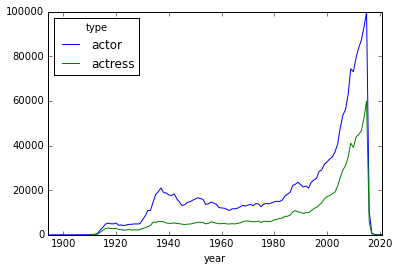

In [32]:
u1.plot()

### Plot the number of actor roles each year and the number of actress roles each year, but this time as a kind='area' plot.

C:\Anaconda3\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


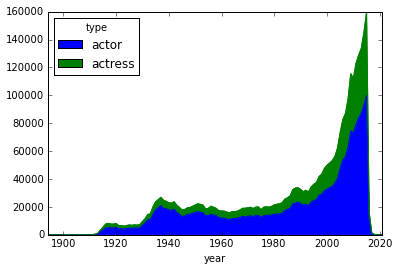

In [33]:
u1.plot(kind='area')

### Plot the difference between the number of actor roles each year and the number of actress roles each year over the history of film.

In [34]:
u1 = u1.fillna(0)

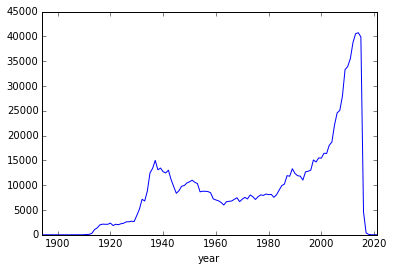

In [35]:
(u1.actor - u1.actress).plot()

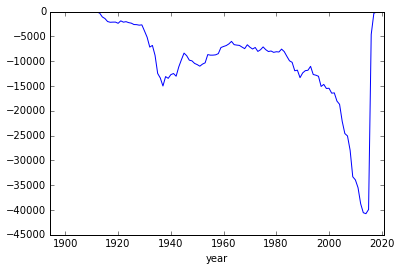

In [36]:
(u1.actress - u1.actor).plot()

### Plot the fraction of roles that have been 'actor' roles each year in the history of film.

In [38]:
k1 = cast[cast.year < 2016].groupby(['year','type']).size()
k1.head()

year  type   
1894  actor      2
      actress    1
1899  actor      6
1900  actor      2
1905  actor      1
dtype: int64

In [39]:
k1 = k1.unstack('type')
k1.head()

type,actor,actress
year,,
1894,2,1
1899,6,NaN
1900,2,NaN
1905,1,NaN
1906,14,3


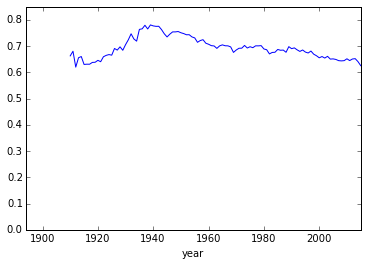

In [40]:
(k1['actor'] / (k1['actor'] + k1['actress'])).plot(kind='line',ylim=0)

### Plot the fraction of supporting (n=2) roles that have been 'actor' roles each year in the history of film.

In [41]:
k1 = cast[(cast.year < 2016) & (cast.n == 2)].groupby(['year','type']).size()
k1.head()

year  type   
1899  actor      2
1906  actor      2
      actress    1
1907  actor      1
1908  actor      2
dtype: int64

In [42]:
k1 = k1.unstack('type')
k1.head()

type,actor,actress
year,,
1899,2,NaN
1906,2,1
1907,1,NaN
1908,2,NaN
1910,1,2


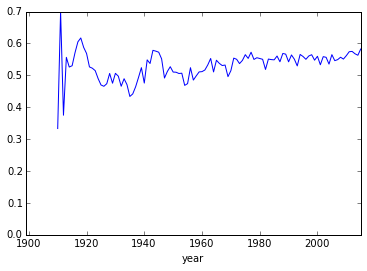

In [43]:
(k1['actor'] / (k1['actor'] + k1['actress'])).plot(kind='line',ylim=0)

### Build a plot with a line for each rank n=1 through n=3, where the line shows what fraction of that rank's roles were 'actor' roles for each year in the history of film.

In [44]:
k2 = cast[(cast.n <= 3) & (cast.year < 2016)].groupby(['year','n','type']).size()
k2.head(10)

year  n  type   
1899  1  actor      2
      2  actor      2
1906  1  actor      2
         actress    1
      2  actor      2
         actress    1
      3  actress    1
1907  1  actor      1
      2  actor      1
      3  actor      1
dtype: int64

In [45]:
k2 = k2.unstack(['n','type'])
k2.head()

n        1     2       1       2       3      
type actor actor actress actress actress actor
year                                          
1899     2     2     NaN     NaN     NaN   NaN
1906     2     2       1       1       1   NaN
1907     1     1     NaN     NaN     NaN     1
1908     1     2     NaN     NaN     NaN     2
1909     1   NaN     NaN     NaN     NaN   NaN

In [46]:
k2['n1_actors_fraction'] = (k2[1]['actor'] / (k2[1]['actor'] + k2[1]['actress']))
k2['n2_actors_fraction'] = (k2[2]['actor'] / (k2[2]['actor'] + k2[2]['actress']))
k2['n3_actors_fraction'] = (k2[3]['actor'] / (k2[3]['actor'] + k2[3]['actress']))

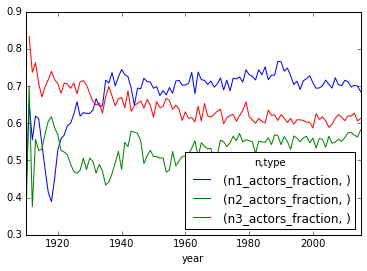

In [48]:
k2[['n1_actors_fraction', 'n2_actors_fraction', 'n3_actors_fraction']].plot(kind='line',xlim=1910)

In [72]:
k3 = cast[(cast.n <= 3) & (cast.year < 2016)]
k3.head(10)

,title,year,name,type,character,n
3,Porndogs: The Adventures of Sadie,2009,Too $hort,actor,Bosco,3
78,Big Apple,2002,Angel 11:11,actor,Angel,2
83,Live Freaky Die Freaky,2006,Nick 13,actor,TV Reporter #1,1
93,Big Money Rustlas,2010,Shaggy 2 Dope,actor,Sheriff Sugar Wolf,2
105,Asad wa arbaa qutat,2007,4 Cats,actor,Themselves,2
120,All Things Fall Apart,2011,50 Cent,actor,Deon,1
121,Caught in the Crossfire,2010,50 Cent,actor,Tino,3
122,Dead Man Running,2009,50 Cent,actor,Thigo,3
125,Freelancers,2012,50 Cent,actor,Malo,1
126,Get Rich or Die Tryin',2005,50 Cent,actor,Marcus,1


In [73]:
k3 = k3.groupby(['year', 'type', 'n']).size()
k3.head(10)

year  type     n
1899  actor    1    2
               2    2
1906  actor    1    2
               2    2
      actress  1    1
               2    1
               3    1
1907  actor    1    1
               2    1
               3    1
dtype: int64

In [74]:
k3 = k3.unstack('type')
k3.head(10)

type    actor  actress
year n                
1899 1      2      NaN
     2      2      NaN
1906 1      2        1
     2      2        1
     3    NaN        1
1907 1      1      NaN
     2      1      NaN
     3      1      NaN
1908 1      1      NaN
     2      2      NaN

In [80]:
r1 = k3.actor / (k3.actor + k3.actress)
r1.head(10)

year  n
1899  1         NaN
      2         NaN
1906  1    0.666667
      2    0.666667
      3         NaN
1907  1         NaN
      2         NaN
      3         NaN
1908  1         NaN
      2         NaN
dtype: float64

In [81]:
r1 = r1.unstack('n')
r1.head(10)

n,1.0,2.0,3.0
year,,,
1899,NaN,NaN,NaN
1906,0.666667,0.666667,NaN
1907,NaN,NaN,NaN
1908,NaN,NaN,NaN
1909,NaN,NaN,NaN
1910,0.400000,0.333333,NaN
1911,0.653846,0.700000,0.833333
1912,0.555556,0.375000,0.736842
1913,0.619403,0.556522,0.762376


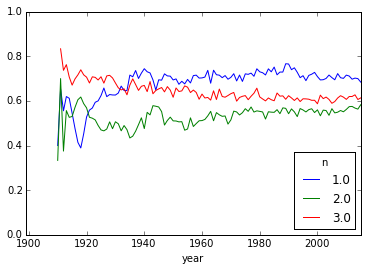

In [79]:
r1.plot(ylim=[0,1])